# Project 2: Prediction of Ames Housing Sale Price  
--- 
- [EDA and Cleaning](./1_EDA_and_Cleaning.ipynb) 
- [Preprocessing and Feature Engineering](./2_Preprocessing_and_Feature_Engineering.ipynb)
- <b>Model Benchmarks</b>
- [Model Tuning](./4_Model_Tuning.ipynb)
- [Production Model and Insights](./5_Production_Model_and_Insights.ipynb)

In [225]:
#Importing libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

--- 
## Overview
Model preparation will be carried out by one-hot encoding and producing dummy variables for categorical features. I will then find out the r2 scores and RMSE of the benchmark model with a linear regression model.

--- 
## Contents 

- [Importing train dataset](#Importing-train-dataset)
- [One-hot encoding](#One-hot-encoding)
- [Creating features matrix and target vector](#Creating-features-matrix-(X)-and-target-vector-(y))
- [Baseline prediction](#Baseline-prediction) 
- [Train/test split train data ](#Train/test-split-train-data)
- [Baseline score](#Baseline-score) 
- [Scaling data](#Scaling-data)
- [Hyperparemeter tuning](#Hyperparemeter-tuning)
- [Cross validation](#Cross-validation)
- [Determining the best benchmark model](#Determining-the-best-benchmark-model)
- [Conclusion](#Conclusion)

---
## Importing train dataset

The preprocessed and cleaned train data from the previous notebook will be imported

In [226]:
train = pd.read_csv('../datasets/train_preprocessed.csv')

In [227]:
train.head(2)

,id,mssubclass,mszoning,lotfrontage,lotarea,lotshape,landcontour,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,foundation,bsmtqual,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtunfsf,heatingqc,electrical,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,functional,fireplaces,fireplacequ,garagetype,garagefinish,garagearea,garagecond,paveddrive,wooddecksf,mosold,yrsold,saleprice,porch,pool,garage,fireplace,bsmt,masvnr,agesold,remodelled,bighouse,2ndflr
0,109,60,RL,0.0,13517,1,Lvl,CulDSac,flat,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,CBlock,3,1,GLQ,533.0,192.0,5,SBrkr,1479,0.0,2,1,3,1,4,Typ,0,0,Attchd,RFn,475.0,3,Y,0,3,2010,130500,1,0,1,0,1,1,34,0,0,1
1,544,60,RL,43.0,11492,1,Lvl,CulDSac,flat,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,PConc,4,1,GLQ,637.0,276.0,5,SBrkr,2122,1.0,2,1,4,1,4,Typ,1,3,Attchd,RFn,559.0,3,Y,0,4,2009,220000,1,0,1,1,1,1,13,0,0,1


In [228]:
train.shape

(2046, 61)

In [229]:
train.head(2)

,id,mssubclass,mszoning,lotfrontage,lotarea,lotshape,landcontour,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,foundation,bsmtqual,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtunfsf,heatingqc,electrical,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,functional,fireplaces,fireplacequ,garagetype,garagefinish,garagearea,garagecond,paveddrive,wooddecksf,mosold,yrsold,saleprice,porch,pool,garage,fireplace,bsmt,masvnr,agesold,remodelled,bighouse,2ndflr
0,109,60,RL,0.0,13517,1,Lvl,CulDSac,flat,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,CBlock,3,1,GLQ,533.0,192.0,5,SBrkr,1479,0.0,2,1,3,1,4,Typ,0,0,Attchd,RFn,475.0,3,Y,0,3,2010,130500,1,0,1,0,1,1,34,0,0,1
1,544,60,RL,43.0,11492,1,Lvl,CulDSac,flat,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,PConc,4,1,GLQ,637.0,276.0,5,SBrkr,2122,1.0,2,1,4,1,4,Typ,1,3,Attchd,RFn,559.0,3,Y,0,4,2009,220000,1,0,1,1,1,1,13,0,0,1


In [230]:
train.dtypes

id               int64
mssubclass       int64
mszoning        object
lotfrontage    float64
lotarea          int64
                ...   
masvnr           int64
agesold          int64
remodelled       int64
bighouse         int64
2ndflr           int64
Length: 61, dtype: object

In [231]:
#convert mssubclass to str as it got converted back to int
train['mssubclass'] = train['mssubclass'].apply(str)

---
## One hot encoding 

Assigning dummy features to categorical columns. 

There are now 182 features.

In [232]:
train_dummies = pd.get_dummies(train, drop_first = True)

In [233]:
train_dummies.head()

,id,lotfrontage,lotarea,lotshape,overallqual,overallcond,yearbuilt,masvnrarea,exterqual,bsmtqual,bsmtexposure,bsmtfinsf1,bsmtunfsf,heatingqc,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,fireplaces,fireplacequ,garagearea,garagecond,wooddecksf,mosold,yrsold,saleprice,porch,pool,garage,fireplace,bsmt,masvnr,agesold,remodelled,bighouse,2ndflr,mssubclass_150,mssubclass_160,mssubclass_180,mssubclass_190,mssubclass_20,mssubclass_30,mssubclass_40,mssubclass_45,mssubclass_50,mssubclass_60,mssubclass_70,mssubclass_75,mssubclass_80,mssubclass_85,mssubclass_90,mszoning_C (all),mszoning_FV,mszoning_I (all),mszoning_RH,mszoning_RL,mszoning_RM,landcontour_HLS,landcontour_Low,landcontour_Lvl,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_sloped,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_Membran,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkFace,masvnrtype_None,masvnrtype_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_None,bsmtfintype1_Rec,bsmtfintype1_Unf,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_None,garagefinish_None,garagefinish_RFn,garagefinish_Unf,paveddrive_P,paveddrive_Y
0,109,0.0,13517,1,6,8,1976,289.0,4,3,1,533.0,192.0,5,1479,0.0,2,1,3,1,4,0,0,475.0,3,0,3,2010,130500,1,0,1,0,1,1,34,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
1,544,43.0,11492,1,7,5,1996,132.0,4,4,1,637.0,276.0,5,2122,1.0,2,1,4,1,4,1,3,559.0,3,0,4,2009,220000,1,0,1,1,1,1,13,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
2,153,68.0,7922,0,5,7,1953,0.0,3,3,1,731.0,326.0,3,

In [234]:
train_dummies.shape

(2046, 194)

In [235]:
train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Columns: 194 entries, id to paveddrive_Y
dtypes: float64(6), int64(33), uint8(155)
memory usage: 933.2 KB


--- 
## Creating features matrix (X) and target vector (y)

In [236]:
features = [col for col in train_dummies.columns if col !='saleprice']
X = train_dummies[features]
y = train_dummies['saleprice']

In [237]:
X.shape

(2046, 193)

In [238]:
y.shape

(2046,)

--- 
## Baseline prediction
The baseline prediction is the mean value of the target vector (y).

Without linear regression modelling, the predicted value for every data point is 181343.

In [239]:
np.mean(y)

181343.84555229716

---
## Train/test split train data 

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

---
## Baseline score

The r2 score for the baseline model is -0.0000702. This is a bad r2 score as it indicates that the baseline model explains basically none of the variability of the response data around its mean.

In [241]:
dummy_constant = DummyRegressor(strategy='constant', constant =181343.84555229716 )
dummy_constant.fit(X_train, y_train)
dummy_constant.score(X_train, y_train)  

-7.022625050967513e-05

---
## Scaling data 

Using StandardScaler to scale data 

In [242]:
ss = StandardScaler()

In [243]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [244]:
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

---
## Hyperparameter tuning 
Since I will be using Ridge, Lasso and ElasticNet regression to evaluate the benchmark model, I will first need to find their optimal alpha values

In [245]:
#optimal Ridge alpha 

ridge = RidgeCV(alphas=np.logspace(0, 5, 200), cv=5)
ridge = ridge.fit(X_train, y_train)

ridge_optimal_alpha = ridge.alpha_
ridge_optimal_alpha

81.19844993184013

In [246]:
#optimal Lasso alpha 

lasso = LassoCV(alphas=np.linspace(.001, 1000, 200), cv=5)
lasso = lasso.fit(X_train, y_train)

lasso_optimal_alpha = lasso.alpha_
lasso_optimal_alpha

412.06088944723615

In [247]:
#optimal ElasticNet alpha 

enet = ElasticNetCV(alphas = np.arange(0.01, 1.0, 0.005), l1_ratio=0.5)
enet = enet.fit(X_train, y_train)

enet_optimal_alpha = enet.alpha_
enet_optimal_alpha

0.12499999999999997

---
## Cross validation 

The cross validation of train data was conducted on 4 linear regression models
- Linear Regression
- Ridge Regression 
- Lasso Regression 
- ElasticNet regression 

The Lasso regression model performed the best with a mean r2 score of <b>0.904</b>, compared with ridge and elastic net regression models with scores of 0.900

In [248]:
#instantiate models 
lr = LinearRegression()
ridge_opt = Ridge(alpha=ridge_optimal_alpha)
lasso_opt = Lasso(alpha=lasso_optimal_alpha)
enet_opt = ElasticNet(alpha=enet_optimal_alpha)

In [249]:
#r2 score for linear regression 
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f" mean r2 score for linear regression model is {lr_scores.mean()}")

 mean r2 score for linear regression model is -8.378617626396828e+23


In [250]:
#r2 score for ridge regression 
ridge_scores = cross_val_score(ridge_opt, X_train, y_train, cv=5)
print(f" mean r2 score for ridge regression model is {ridge_scores.mean()}")

 mean r2 score for ridge regression model is 0.8999050071460388


In [251]:
#r2 score for lasso
lasso_scores = cross_val_score(lasso_opt, X_train, y_train, cv=5)
print(f" mean r2 score for lasso regression model is {lasso_scores.mean()}")

 mean r2 score for lasso regression model is 0.9040442755750263


In [252]:
#r2 score for enet
enet_scores = cross_val_score(enet_opt, X_train, y_train, cv=5)
print(f" mean r2 score for enet regression model is {enet_scores.mean()}")

 mean r2 score for enet regression model is 0.8999035737904568


---
## Determining the best benchmark model

### Determining r2 scores for train and test sets for all 4 models

To further determine which is the best benchmark model. I will calculate the r2 scores for the train and test sets for all 4 models

- Linear regression r2 score for train (0.929) and test (-6.608937116937914e+19) have a difference of close to 1. This shows that the model is extremely overfitted with high variance. 

- For ridge, lasso or elastic net regression, the difference between train and test r2 scores for all 3 models are very similar.

In [253]:
lr.fit(X_train, y_train)
print (f" linear regression r2 score for train set is {lr.score(X_train, y_train)}")
print (f" linear regression r2 score for test set is {lr.score(X_test, y_test)}")

 linear regression r2 score for train set is 0.929353324502048
 linear regression r2 score for test set is -6.608937116937914e+19


In [254]:
ridge_opt.fit(X_train, y_train)
print (f" ridge regression r2 score for train set is {ridge_opt.score(X_train, y_train)}")
print (f" ridge regression r2 score for test set is {ridge_opt.score(X_test, y_test)}")

 ridge regression r2 score for train set is 0.9260810792835636
 ridge regression r2 score for test set is 0.9073986063157763


In [255]:
lasso_opt.fit(X_train, y_train)
print (f" lasso regression r2 score for train set is {lasso_opt.score(X_train, y_train)}")
print (f" lasso regression r2 score for test set is {lasso_opt.score(X_test, y_test)}")

 lasso regression r2 score for train set is 0.9224039683380123
 lasso regression r2 score for test set is 0.9073404866925068


In [256]:
enet_opt.fit(X_train, y_train)
print (f" enet regression r2 score for train set is {enet_opt.score(X_train, y_train)}")
print (f" enet regression r2 score for test set is {enet_opt.score(X_test, y_test)}")

 enet regression r2 score for train set is 0.9254933207437611
 enet regression r2 score for test set is 0.90799074145515


### Calculating RMSE of all 4 models 

Since the r2 scores for ridge, lasso and enet are so similar, I will determine the best benchmark model with their RMSE

The RMSE score for <b>elastic net regression</b> model is the lowest (24149)

In [257]:
lr_pred = lr.predict(X_test)
lr_rmse = (mean_squared_error(y_test, lr_pred))**0.5
print (f" RMSE for linear regression is {lr_rmse}")

 RMSE for linear regression is 647221119612655.1


In [258]:
ridge_pred = ridge_opt.predict(X_test)
ridge_rmse = (mean_squared_error(y_test, ridge_pred))**0.5
print (f" RMSE for ridge regression is {ridge_rmse}")

 RMSE for ridge regression is 24226.7764589518


In [259]:
lasso_pred = lasso_opt.predict(X_test)
lasso_rmse = (mean_squared_error(y_test, lasso_pred))**0.5
print (f" RMSE for lasso regression is {lasso_rmse}")

 RMSE for lasso regression is 24234.37801978983


In [260]:
enet_pred = enet_opt.predict(X_test)
enet_rmse = (mean_squared_error(y_test, enet_pred))**0.5
print (f" RMSE for elastic net regression is {enet_rmse}")

 RMSE for elastic net regression is 24149.19375937076



### Residual plot of best benchmark model (Elastic Net)

The residual plot shows that that the predicted values are normally distributed around zero, which is the desired outcome of using a regularisation model on the data.

In [261]:
enet_opt.fit(X_train, y_train)
pred = enet_opt.predict(X_test)
residuals = y_test - pred

Text(0, 0.5, 'Residuals')

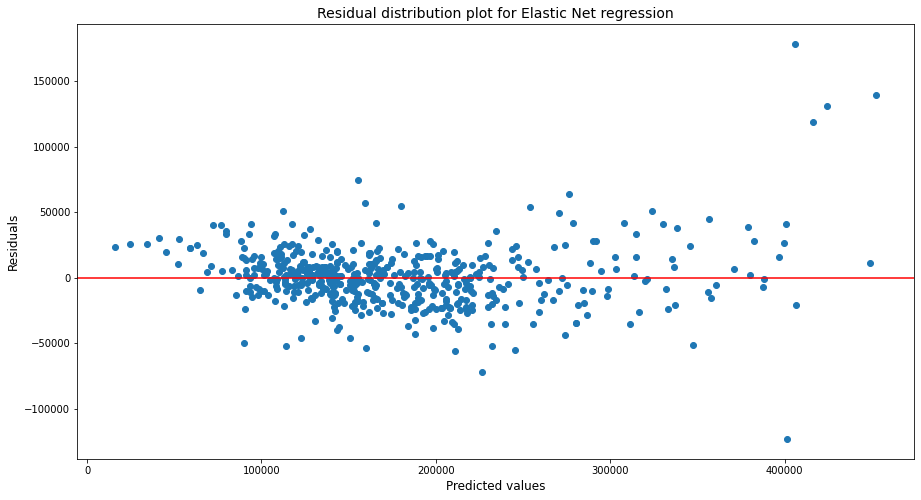

In [262]:
plt.figure(figsize=(15,8))

plt.scatter(pred, residuals)
plt.axhline(0, linestyle='-', color='r')
plt.title('Residual distribution plot for Elastic Net regression', fontsize=14)
plt.xlabel('Predicted values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

---
## Conclusion 

Based on the results of cross validation on all 4 models, I discovered the Elastic Net regression benchmark model produced the best results. 
- The r2 score for the train data was 0.908
- The r2 score for the test data was 0.925
- The RMSE was 24149

I will conduct model tuning by finetuning the feature selection in the next notebook (Model Tuning).

In [263]:
# exporting train_dummies.csv which will be used in the next notebook
train_dummies.to_csv('../datasets/train_dummies.csv', index=False)